### Dataset Selection

In [1]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from pandas import DataFrame
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Preprocessing

In [2]:
# data.isnull().sum()
# data.info()
data['sex'] = data['sex'].replace({'male':1,'female':2})
data['smoker'] = data['smoker'].replace({'yes':1,'no':2})
data['region'] = data['region'].replace({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
# data['region'].unique()
# data.describe()
# data

### Data splitting

In [3]:
X = DataFrame(data,columns=['age','sex','bmi','children','smoker','region'])
y = DataFrame(data,columns=['charges'])

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state = 1)


### Linear Regression

In [4]:
regression = LinearRegression()

# Train the model on the Training Data and Testing Data
regression.fit(X_train,y_train) # training data
# regression.fit(X_test,y_test) # testing data

LinearRegression()

### Predict Data and Model Training

In [5]:
# train data
y_pred_train = regression.predict(X_train)

# test data
y_pred_test = regression.predict(X_test)
# y_pred_test
# y_pred_train

#### the model's performance on the training set


In [6]:
# coefficients, intercept, and evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

slope = regression.coef_
intercept = regression.intercept_

print("Mean Squared Error (MSE) on the training set:", mse_train)
print("R-squared (R2) on the training set:", r2_train)
print('slope: ',slope)
print('intercept: ',intercept)

Mean Squared Error (MSE) on the training set: 36849010.766560204
R-squared (R2) on the training set: 0.7551158429564245
slope:  [[   252.07830816    270.1850953     316.55473012    364.49255776
  -24069.87438208    259.23126409]]
intercept:  [35487.70485864]


### Evaluation On Testing Dataset with MSE and R-square

#### the model's performance on the testing dataset


In [7]:
# rsquare: how predict value is accurate

r2_test = r2_score(y_test,y_pred_test)
print('R-squared (R2) on the testing dataset: ',r2_test)

mse_test = mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error (MSE) on the testing set:', mse_test)

R-squared (R2) on the testing dataset:  0.7338069544102044
Mean Squared Error (MSE) on the testing set: 35807072.806139216


### Visualization

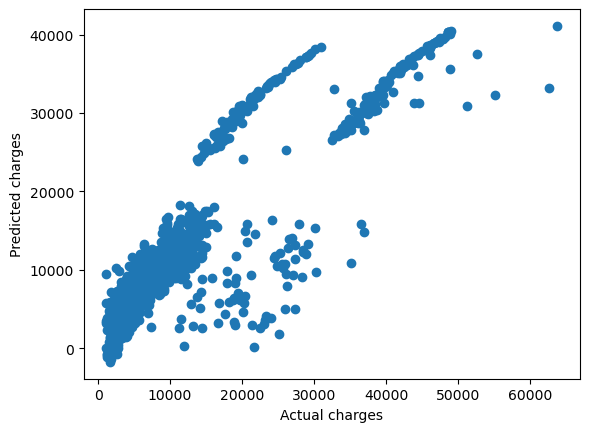

In [8]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.show()

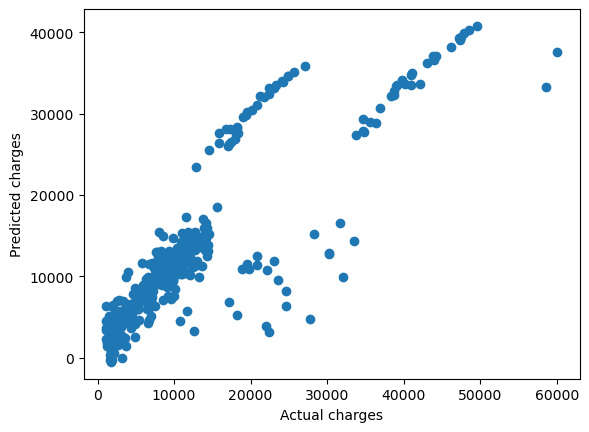

In [9]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.show()

#### Residual (The differences between acutal and predicted values)

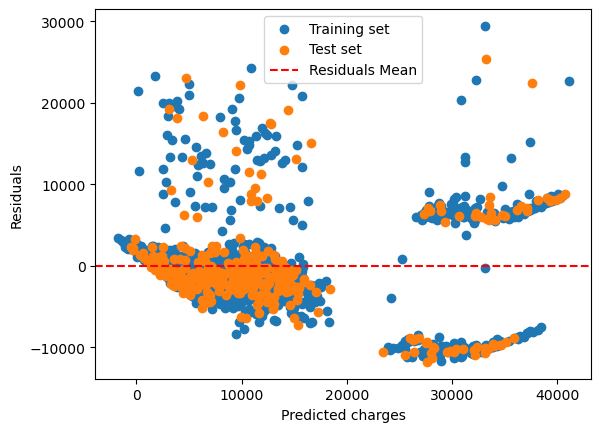

In [10]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.scatter(y_pred_train, residuals_train, label='Training set')
plt.scatter(y_pred_test, residuals_test, label='Test set')
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted charges')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Parameter Tuning (GridSearch and RandomSearch)

In [11]:
# Ridge regression
ridge = Ridge()

# alpha is the regularization strength
param_grid = {'alpha': [0.01,0.1, 1, 10,100]}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)
print("Best score is:", grid_search.best_score_)
# grid_search

Best Hyperparameters: {'alpha': 1}
Best score is: 0.746105203114074


In [12]:
best_model = grid_search.best_estimator_

# Predictions using the best model
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)
best_model = grid_search.best_estimator_

# Evaluate the model with the best hyperparameters
train_accurate_best = r2_score(y_train, y_pred_train_best)
test_accurate_best = r2_score(y_test, y_pred_test_best)

mse_test = mean_squared_error(y_test, y_pred_test_best)
mse_train = mean_squared_error(y_train, y_pred_train_best)

print('Train R-squared (Best Model):', train_accurate_best)
print('Test R-squared (Best Model):', test_accurate_best)

print('Mean Squared Error For Train (MSE)(Best) :', mse_train)
print('Mean Squared Error For Test (MSE)(Best) :', mse_test)

Train R-squared (Best Model): 0.755092963411123
Test R-squared (Best Model): 0.7341153621797314
Mean Squared Error For Train (MSE)(Best) : 36852453.57242127
Mean Squared Error For Test (MSE)(Best) : 35765587.20146098


In [13]:
param_distributions = {
    'fit_intercept': [True, False]
}

# RandomSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(regression, param_distributions, n_iter=2, cv=5, random_state=1)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)
print("Best score is:", random_search.best_score_)

# random_search

Best Hyperparameters: {'fit_intercept': True}
Best score is: 0.746021755722732


In [14]:
best_model = random_search.best_estimator_

# Predictions using the best model
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)
best_model = random_search.best_estimator_

# Evaluate the model with the best hyperparameters
train_accurate_best = r2_score(y_train, y_pred_train_best)
test_accurate_best = r2_score(y_test, y_pred_test_best)

mse_test = mean_squared_error(y_test, y_pred_test_best)
mse_train = mean_squared_error(y_train, y_pred_train_best)


print('Mean Squared Error For Test (MSE)(Best) :', mse_test)
print('Mean Squared Error For Train (MSE)(Best) :', mse_train)

print('Test R-squared (Best Model):', test_accurate_best)
print('Train R-squared (Best Model):', train_accurate_best)

Mean Squared Error For Test (MSE)(Best) : 35807072.806139216
Mean Squared Error For Train (MSE)(Best) : 36849010.766560204
Test R-squared (Best Model): 0.7338069544102044
Train R-squared (Best Model): 0.7551158429564245
